In [22]:
using Plots
using LinearAlgebra
using NumericalIntegration

In [12]:
using LaTeXStrings

# 1. Set the backend (GR is the default, fast, and handles this well)
gr()

# 2. Configure Global Settings for Retina + LaTeX Look
default(
    # Retina / High-DPI settings
    fmt = :png,         # PNG renders faster than SVG for complex plots
    dpi = 300,          # 300 DPI makes it crisp on Retina screens (standard is 72-100)
    
    # LaTeX Font settings
    fontfamily = "Computer Modern", # Use the standard LaTeX font
    guidefontsize = 12,             # Adjust font sizes for readability
    tickfontsize = 10,
    legendfontsize = 10
)

QUANTUM HARMONIC OSCILLATOR

In [17]:
"""
N -- Number of eigenfunctions to compute
"""
function harmonic_wavefunction(x, N)
    f_1 = 0
    f0 = (1 / π^0.25) * exp.(-0.5 * x.^2)
    eigenfunctions = Array{Float64,2}(undef, length(x), N+2)
    eigenfunctions[:,2] .= f0
    eigenfunctions[:,1] .= f_1
    for i in 3:N+1
        eigenfunctions[:,i] .= sqrt(2 / i) * x .* eigenfunctions[:,i-1] - sqrt((i - 1) / i) * eigenfunctions[:,i-2]
    end
    return eigenfunctions[:,2:end]
end

harmonic_wavefunction

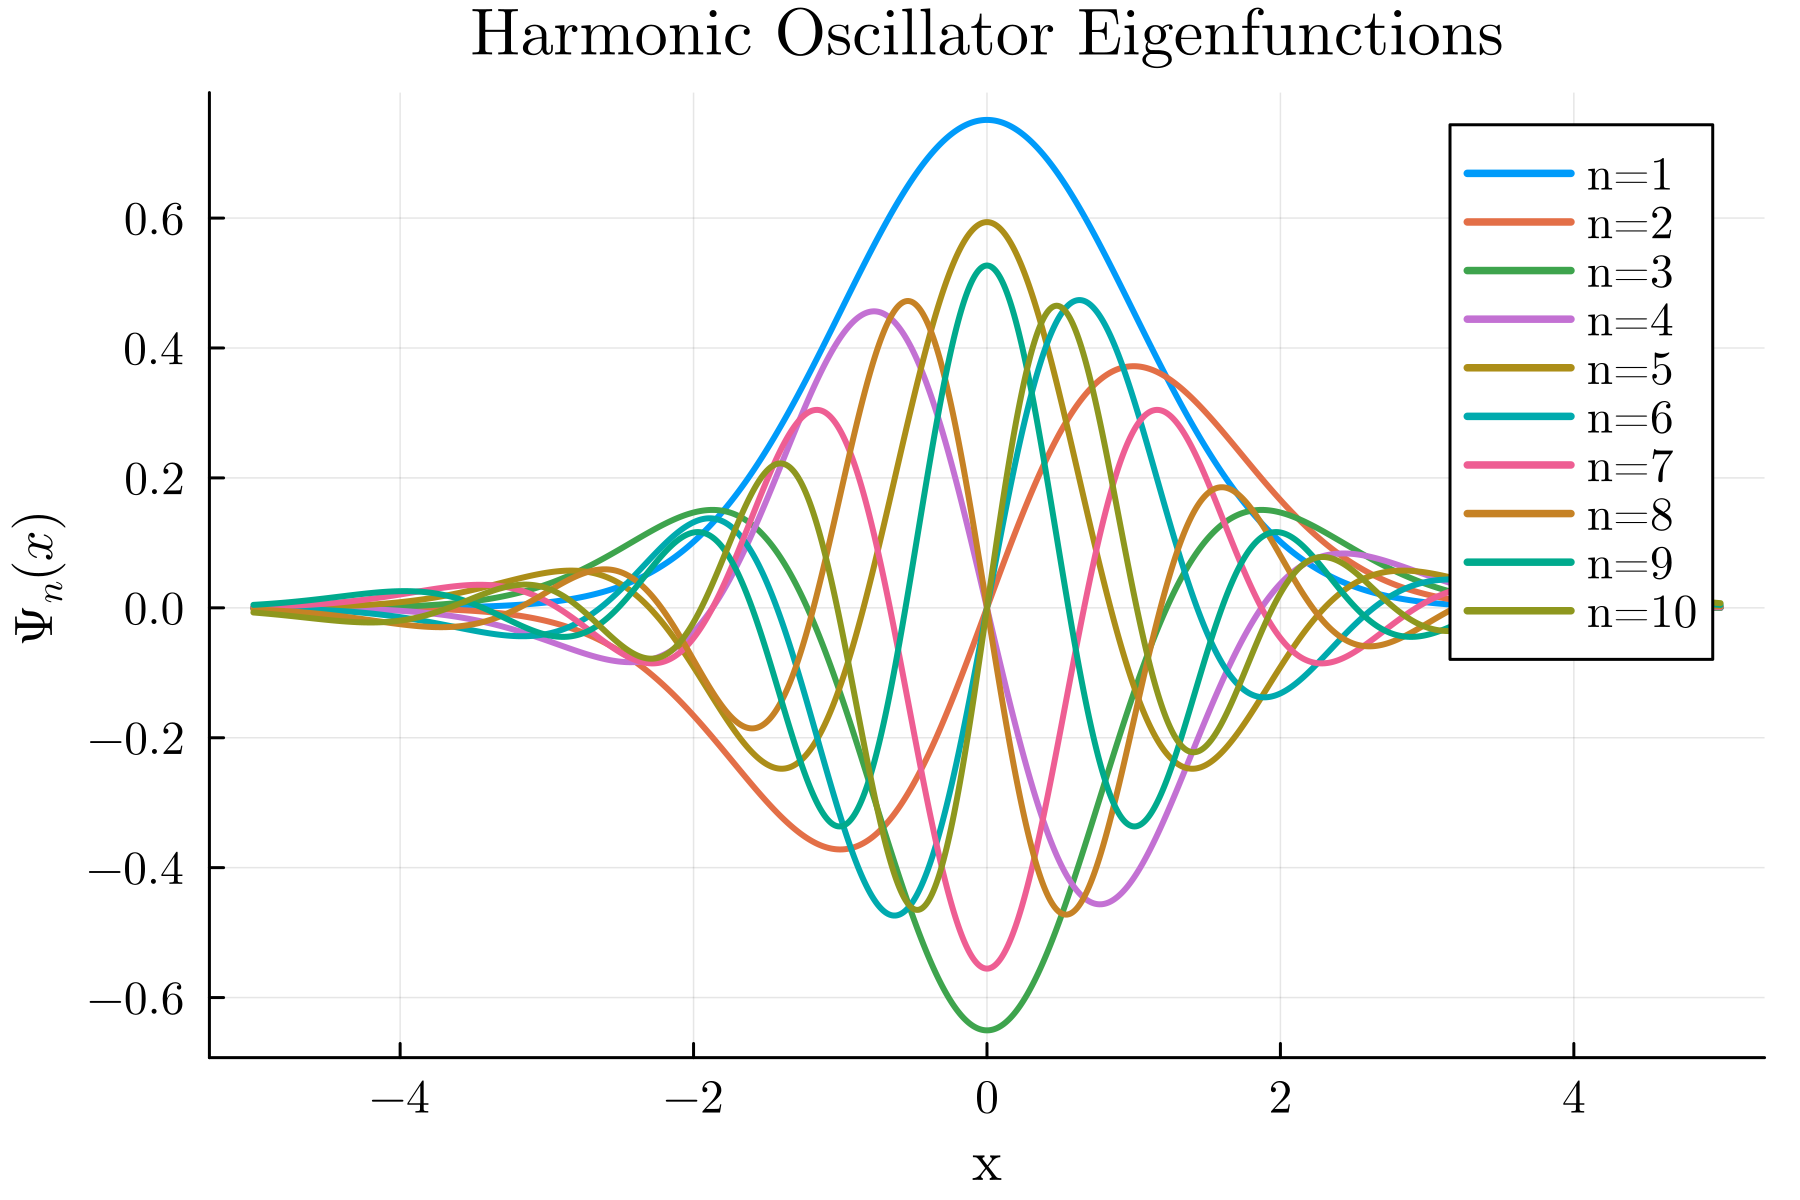

In [19]:
x = LinRange(-5, 5, 1000)
N = 10
eigenfunctions = harmonic_wavefunction(x, N)
plot()  # Create initial plot
for n in 1:N
    plot!(x, eigenfunctions[:,n], label="n=$n", lw=2)
end
plot!(title="Harmonic Oscillator Eigenfunctions", xlabel="x", ylabel=L"\Psi_n(x)")
display(plot!())

In [67]:
function harmonic_density(psi, E, n1, n2, beta)
    vec1 = psi[n1,:]
    vec2 = psi[n2,:]
    energy = exp.(-beta.*E)
    return dot(vec2, vec1 .* energy)
end

harmonic_density (generic function with 1 method)

In [68]:
function diagonal_harmonic_density(psi, E, beta, x)
    N = length(x)
    density = zeros(N)
    for i in 1:N
        density[i] = harmonic_density(psi, E, i, i, beta)
    end
    return density
end

diagonal_harmonic_density (generic function with 1 method)

In [69]:
function partition_function(psi, E, beta, x)
    integrande = diagonal_harmonic_density(psi, E, beta, x)
    method = SimpsonEven()
    return integrate(x, integrande, method)
end

partition_function (generic function with 1 method)

In [70]:
x = LinRange(-2, 2, 1000)
psi = harmonic_wavefunction(x, 50)
E = collect(0:50) .+ 0.5
beta = collect(0.5:0.5:2.0)

4-element Vector{Float64}:
 0.5
 1.0
 1.5
 2.0

In [71]:
for i in 1:length(beta)
    Z = partition_function(psi, E, beta[i], x)
    println("Partition function at beta=$(beta[i]) is Z=$Z")
end

Partition function at beta=0.5 is Z=Inf
Partition function at beta=1.0 is Z=Inf
Partition function at beta=1.5 is Z=Inf
Partition function at beta=2.0 is Z=Inf


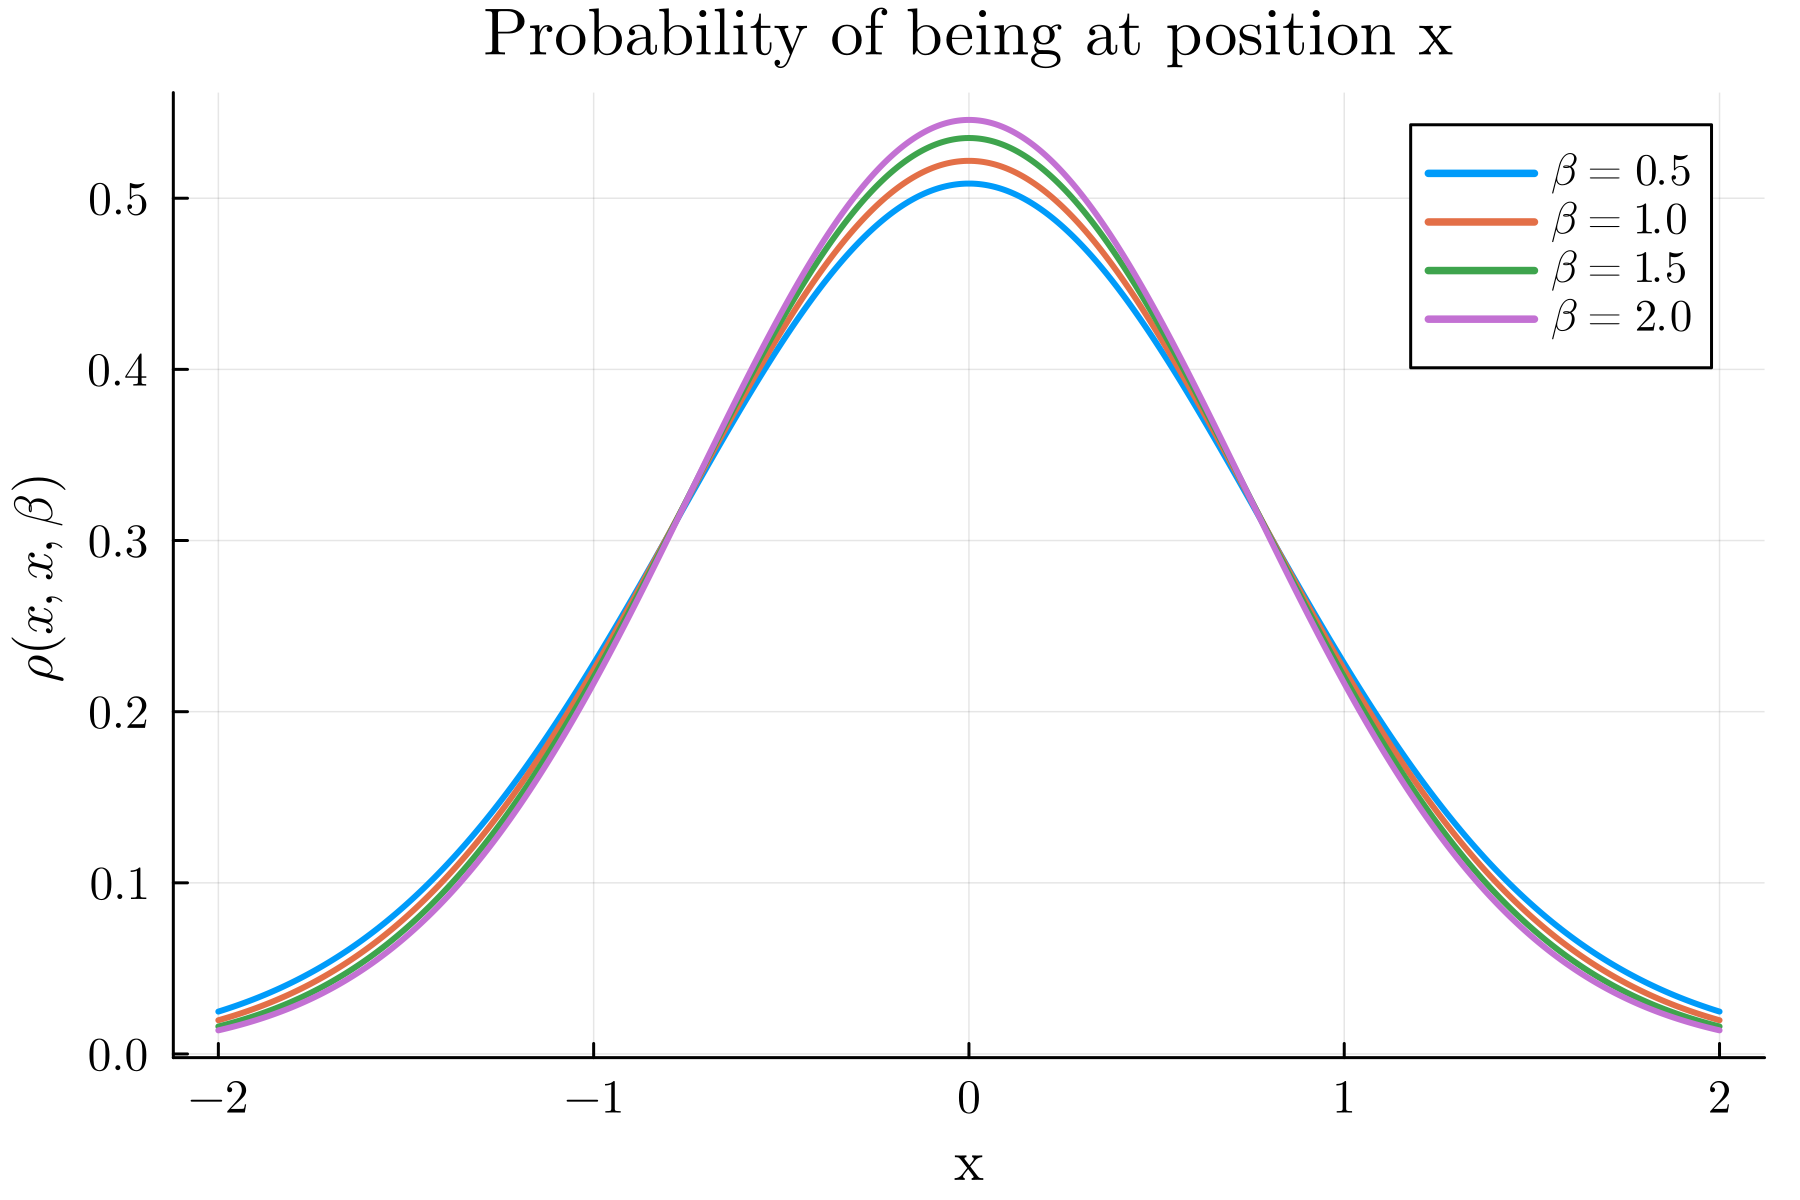

In [51]:
plot()
for i in 1:length(beta)
    density = diagonal_harmonic_density(psi, E, beta[i], x)
    Z = partition_function(psi, E, beta[i], x)
    density ./= Z  # Normalize the density
    plot!(x, density, label=L"\beta=%$(beta[i])", lw=2)
end
plot!(title="Probability of being at position x", xlabel="x", ylabel=L"\rho(x, x, \beta)")
display(plot!())

HIGH TEMPERATURE LIMIT CONVOLUTION

In [ ]:
function matrix_square(x, rho)
    l = length(x)
    n = length(rho[:,1])
    m = length(rho[1,:])
    if n != l || m != l
        error("Matrix dimensions do not match the length of x")
    end
    